In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings("ignore")



import os



## Load the dataset

In [2]:
train_df=pd.read_csv("tested.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Getting to know the dataset

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Exploratory data analysis (EDA)

In [5]:
def plot(var):
    plt.figure(figsize=(6, 3))
    sns.countplot(train_df[var])    
    plt.ylabel("Frequency")
    plt.show()
    print("{} \n {}".format(train_df[var].value_counts().index,train_df[var].value_counts() ))

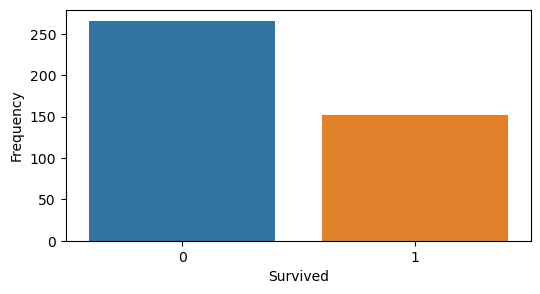

Int64Index([0, 1], dtype='int64') 
 0    266
1    152
Name: Survived, dtype: int64


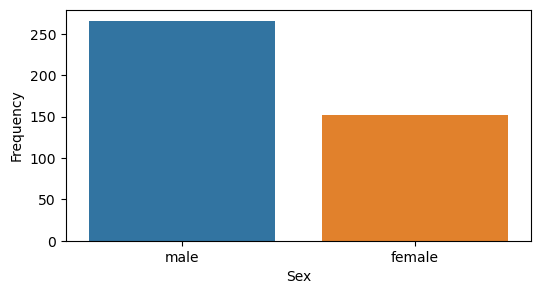

Index(['male', 'female'], dtype='object') 
 male      266
female    152
Name: Sex, dtype: int64


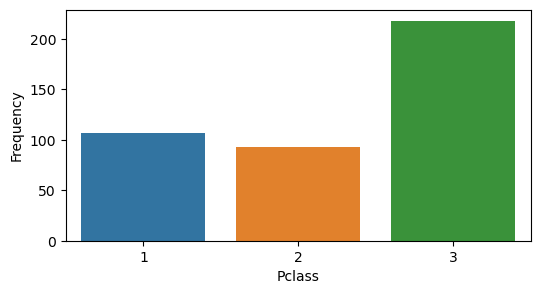

Int64Index([3, 1, 2], dtype='int64') 
 3    218
1    107
2     93
Name: Pclass, dtype: int64


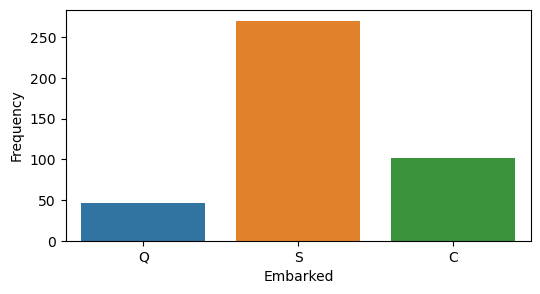

Index(['S', 'C', 'Q'], dtype='object') 
 S    270
C    102
Q     46
Name: Embarked, dtype: int64


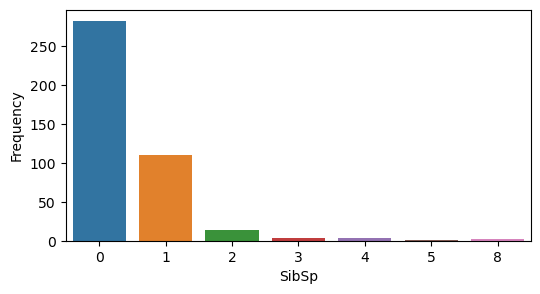

Int64Index([0, 1, 2, 3, 4, 8, 5], dtype='int64') 
 0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


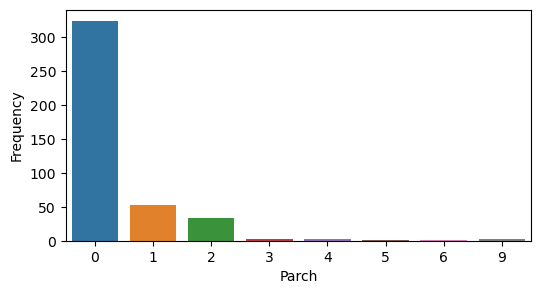

Int64Index([0, 1, 2, 3, 4, 9, 6, 5], dtype='int64') 
 0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


In [6]:
selected_features = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for feature in selected_features:

    plot(feature)

* Correlation a way to understand the relationship between multiple variables and attributes in your dataset.

In [7]:
correlation = train_df.drop(['Name', 'Sex', "Ticket", "Cabin","Embarked"], axis=1).corr()

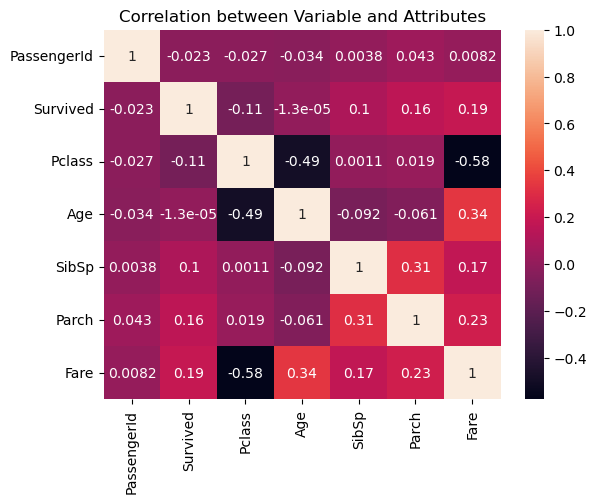

In [8]:
sns.heatmap(correlation, annot=True)
plt.title("Correlation between Variable and Attributes")
plt.show()

#### Outlier Detection

In [9]:
def plot_outilers(x):
    plt.figure(figsize=(9,3))
    f = sns.boxplot(data=train_df, y = x)
    f.set(title="Outliers of {}".format(x))
    plt.show()

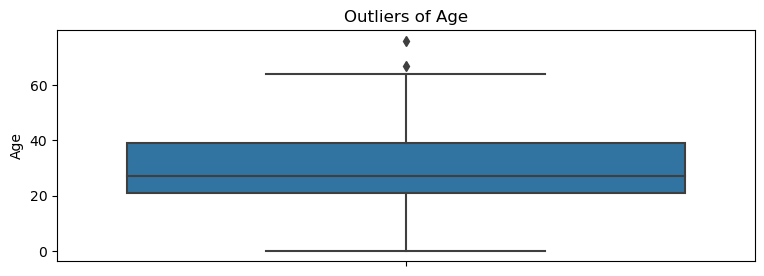

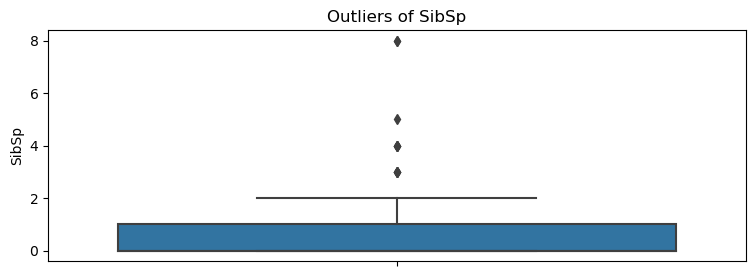

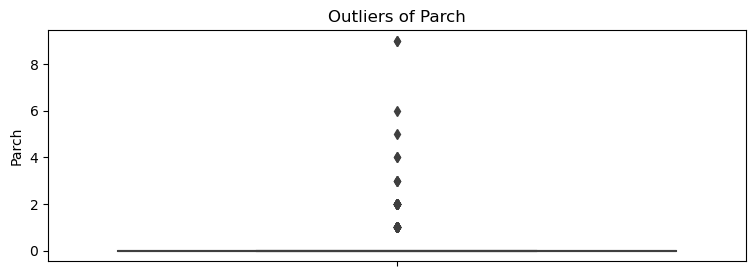

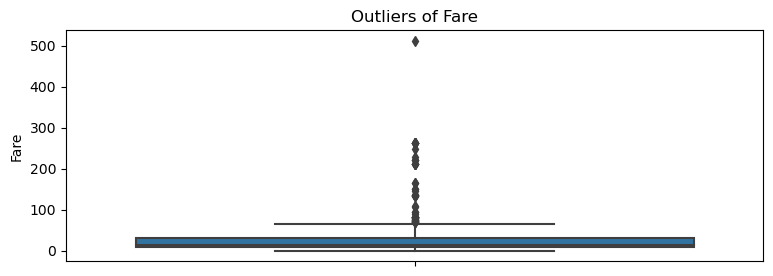

In [10]:
for i in ["Age", "SibSp", "Parch", "Fare"]:
    plot_outilers(i)

* Outlier detection function

In [11]:

def detec_outlier(df, features):
    outliers = []
    
    for c in features:
        #Q1
        q1 = np.percentile(df[c], 25)
        #Q3
        q3 = np.percentile(df[c], 75)
        #IQR
        iqr = q3 - q1
        # outlier step
        outlier_step = iqr * 1.5
        # detect outlier
        outlier_list_col = df[(df[c] < q1-outlier_step) | (df[c] > q3 + outlier_step)].index
        #store indeces
        outliers.extend(outlier_list_col)
        
    outliers = Counter(outliers)
    multiple_outliers = list(i for i, v in outliers.items() if v > 2)
    
    return multiple_outliers

In [12]:
train_df.loc[detec_outlier(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Drop the outlier in the dataset

In [13]:
outlier = detec_outlier(train_df, ["Age", "SibSp", "Parch", "Fare"])

train_df = train_df.drop(outlier, axis=0).reset_index(drop=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_df.shape

(418, 12)

### Find the missing value in the dataset

Concatenate to training and testing data

In [15]:
train_length = len(train_df)

df = train_df

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# How many rows and columns there in the dataset.
print("There are {} rows and {} columns.".format(df.shape[0], df.shape[1]))

There are 418 rows and 12 columns.


In [18]:
# find the missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Fill the missing value

In [19]:
# Embarked
df.Embarked.isnull().sum()

0

In [20]:
df.Embarked = df.Embarked.fillna("C")
df.Embarked.isnull().sum()

0

In [21]:
#  Fare
df.Fare.isnull().sum()

1

In [22]:
df.Fare = df.Fare.fillna(df[(df.Pclass == 3) & (df.Embarked == "S")].Fare.mean())
df.Fare.isnull().sum()

0

In [23]:
# Age
df.Age.isnull().sum()

86

<AxesSubplot:>

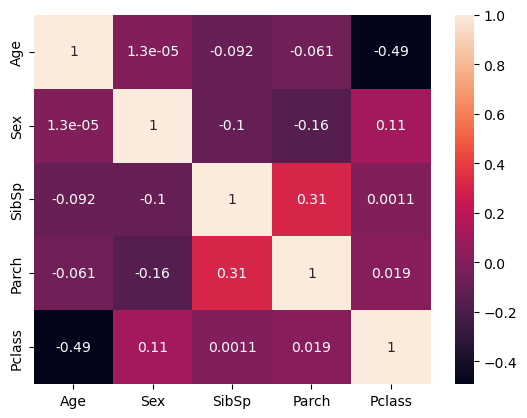

In [24]:
df.Sex = [1 if each == "male" else 0 for each in df.Sex]
sns.heatmap(df[["Age","Sex", "SibSp","Parch", "Pclass"]].corr(), annot=True)

In [25]:
# Age is not correlated with sex but it is correlated with parch, sibsp and pclass
index_nan_age = list(df.Age[df.Age.isnull()].index)

for i in index_nan_age:
    age_pred = df.Age[(df.SibSp == df.iloc[i].SibSp) & (df.Parch == df.iloc[i].Parch) & (df.Pclass == df.iloc[i].Pclass)].median()
    age_median = df.Age.median()
    if not np.isnan(age_pred):
        df["Age"].iloc[i] = age_pred
    else:
        df.Age.iloc[i] = age_median

In [26]:
df.Age.isnull().sum()

0

## Feature Engineering

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
# Name columns drop
df.drop(['Name'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,0,22.0,1,1,3101298,12.2875,NaN,S


#### Family size


In [33]:
df["FamilySize"] = df.SibSp + df.Parch + 1

In [34]:
df["family_size"] = [1 if each < 5 else 0 for each in df.FamilySize]

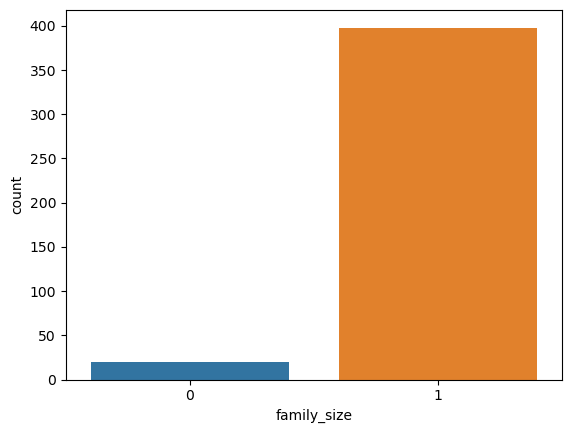

1    398
0     20
Name: family_size, dtype: int64

In [35]:
sns.countplot(data=df, x = "family_size")
plt.show()
df.family_size.value_counts()

In [36]:
df = pd.get_dummies(df, columns=["family_size"], dtype=int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,family_size_0,family_size_1
0,892,0,3,1,34.5,0,0,330911,7.8292,NaN,Q,1,0,1
1,893,1,3,0,47.0,1,0,363272,7.0000,NaN,S,2,0,1
2,894,0,2,1,62.0,0,0,240276,9.6875,NaN,Q,1,0,1
3,895,0,3,1,27.0,0,0,315154,8.6625,NaN,S,1,0,1
4,896,1,3,0,22.0,1,1,3101298,12.2875,NaN,S,3,0,1


#### Embarked

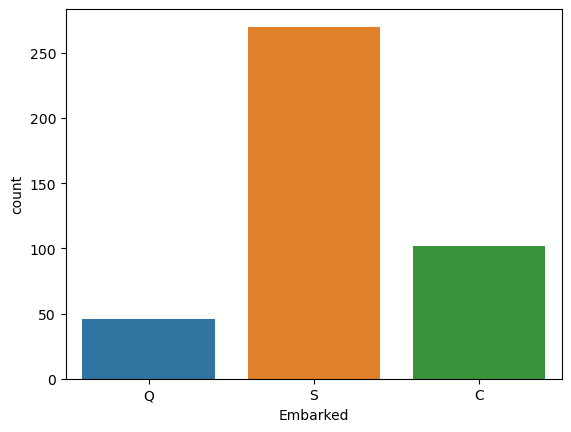

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [37]:
sns.countplot(data=df, x="Embarked")
plt.show()
df.Embarked.value_counts()

In [38]:
df = pd.get_dummies(df, columns=["Embarked"], dtype=int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,1,34.5,0,0,330911,7.8292,NaN,1,0,1,0,1,0
1,893,1,3,0,47.0,1,0,363272,7.0000,NaN,2,0,1,0,0,1
2,894,0,2,1,62.0,0,0,240276,9.6875,NaN,1,0,1,0,1,0
3,895,0,3,1,27.0,0,0,315154,8.6625,NaN,1,0,1,0,0,1
4,896,1,3,0,22.0,1,1,3101298,12.2875,NaN,3,0,1,0,0,1


#### Ticket

In [39]:
ticket_list = []

for i in df.Ticket:
    if not i.isdigit():
        t = i.replace(".", "").replace("/","").strip().split(" ")[0]
        ticket_list.append(t)
    else:
        ticket_list.append("x")

df["Ticket"] = ticket_list

In [40]:
df = pd.get_dummies(df, columns=["Ticket"], dtype=int, prefix="T")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,FamilySize,...,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_x
0,892,0,3,1,34.5,0,0,7.8292,NaN,1,...,0,0,0,0,0,0,0,0,0,1
1,893,1,3,0,47.0,1,0,7.0000,NaN,2,...,0,0,0,0,0,0,0,0,0,1
2,894,0,2,1,62.0,0,0,9.6875,NaN,1,...,0,0,0,0,0,0,0,0,0,1
3,895,0,3,1,27.0,0,0,8.6625,NaN,1,...,0,0,0,0,0,0,0,0,0,1
4,896,1,3,0,22.0,1,1,12.2875,NaN,3,...,0,0,0,0,0,0,0,0,0,1


#### Pclass

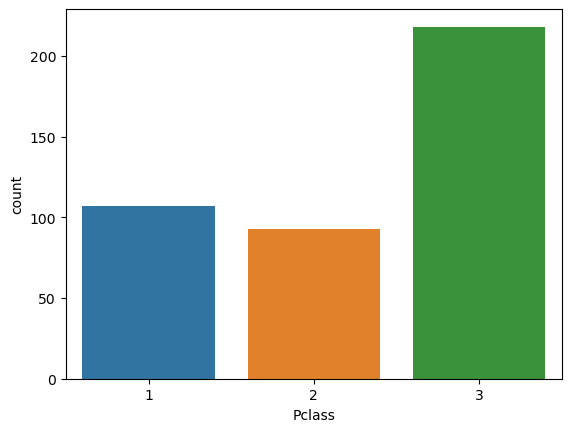

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [41]:
sns.countplot(data=df, x="Pclass")
plt.show()
df.Pclass.value_counts()

In [42]:
df["Pclass"] = df.Pclass.astype("category")
df = pd.get_dummies(df,columns=["Pclass"],dtype=int)
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,FamilySize,family_size_0,...,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,892,0,1,34.5,0,0,7.8292,NaN,1,0,...,0,0,0,0,0,0,1,0,0,1
1,893,1,0,47.0,1,0,7.0000,NaN,2,0,...,0,0,0,0,0,0,1,0,0,1
2,894,0,1,62.0,0,0,9.6875,NaN,1,0,...,0,0,0,0,0,0,1,0,1,0
3,895,0,1,27.0,0,0,8.6625,NaN,1,0,...,0,0,0,0,0,0,1,0,0,1
4,896,1,0,22.0,1,1,12.2875,NaN,3,0,...,0,0,0,0,0,0,1,0,0,1


#### Sex

In [43]:
df["Sex"] = df.Sex.astype("category")
df = pd.get_dummies(df,columns=["Sex"],dtype=int)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,FamilySize,family_size_0,family_size_1,...,T_STONO2,T_STONOQ,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,892,0,34.5,0,0,7.8292,NaN,1,0,1,...,0,0,0,0,1,0,0,1,0,1
1,893,1,47.0,1,0,7.0000,NaN,2,0,1,...,0,0,0,0,1,0,0,1,1,0
2,894,0,62.0,0,0,9.6875,NaN,1,0,1,...,0,0,0,0,1,0,1,0,0,1
3,895,0,27.0,0,0,8.6625,NaN,1,0,1,...,0,0,0,0,1,0,0,1,0,1
4,896,1,22.0,1,1,12.2875,NaN,3,0,1,...,0,0,0,0,1,0,0,1,1,0


### Drop Passenger ID and Cabin

In [44]:
df.drop(["PassengerId", "Cabin"], axis=1, inplace=True)
df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'family_size_0', 'family_size_1', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'T_A', 'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_C', 'T_CA',
       'T_FC', 'T_FCC', 'T_LP', 'T_PC', 'T_PP', 'T_SC', 'T_SCA3', 'T_SCA4',
       'T_SCAH', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_WC', 'T_WEP', 'T_x',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

# Modeling

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Splitting dataset into training and testing

In [47]:
X_train = df.drop(labels=["Survived"], axis=1)
y_train = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=31)

### Hyperparameters
* Grid Search 
* Cross Validation

In [48]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state,probability=True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state, max_iter=3000, solver="lbfgs"),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"],
                    }

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [49]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
1.0
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.9489919354838712
Fitting 10 folds for each of 54 candidates, totalling 540 fits
1.0
Fitting 10 folds for each of 14 candidates, totalling 140 fits
1.0
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8209677419354838


Text(0.5, 1.0, 'Cross Validation Scores')

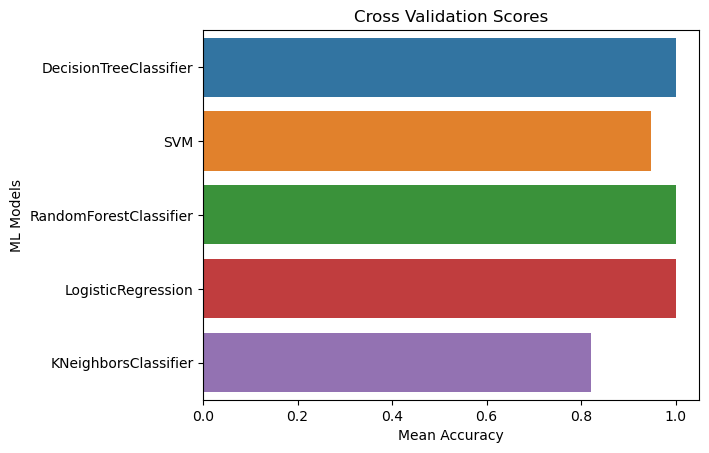

In [50]:
cv_results = pd.DataFrame({
    "Cross Validation Means":cv_result, 
    "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression","KNeighborsClassifier"]})

g = sns.barplot(data=cv_results, x="Cross Validation Means", y="ML Models" )
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")